### Reading Data

In [491]:
#import pandas
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('heart_statlog_cleveland_hungary_final.csv' )


In [492]:
#data.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
#               'fbs', 'restecg', 'thalach', 'exang', 
#               'oldpeak', 'slope', 'ca', 'thal', 'target']

#menampilkan 5 data teratas
data.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [493]:
data.tail()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1
1189,38,1,3,138,175,0,0,173,0,0.0,1,0


In [494]:
data.shape

(1190, 12)

In [495]:
data = data[data >= 0]

In [496]:
data

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [497]:
data.shape

(1190, 12)

In [498]:
# mengecek null value
data.isna().sum()

age                     0
sex                     0
chest pain type         0
resting bp s            0
cholesterol             0
fasting blood sugar     0
resting ecg             0
max heart rate          0
exercise angina         0
oldpeak                13
ST slope                0
target                  0
dtype: int64

 - terlihat kolom **ca** dan **thal** memiliki null values

In [499]:
# Menganti nilai null value dengan median dari kolom
#data = data.fillna(data.thal.median())
data = data.fillna(data.oldpeak.median())

In [500]:
data.isna().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [501]:
# melihat jumlah nilai dari kolom target
data.target.value_counts()

1    629
0    561
Name: target, dtype: int64

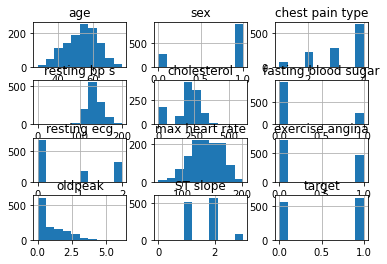

In [502]:
# ditribusi data
data.hist()

plt.show()

In [503]:
# mengganti nilai 1,2,3,4 pada kolom target menjadi 1
# data.target = data.target.replace({2:1, 3:1, 4:1})

# data.target.value_counts()

### Feature Selection

Features selection adalah metode untuk mencari feature-feature yang penting yang akan digunakan untuk pelatihan model. Dengan menggunakan SelectKbeat dan chi2 maka akan mencari nilai tertinggi dari masing-masing kolom. Kolom yang memiliki nilai tertinggi dianggap sebagai kolom penting.

In [504]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [505]:
data.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

In [506]:
xfeatures = data[['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope']]
ylabel = data['target']

In [507]:
skb = SelectKBest(score_func=chi2, k=7)
best_features_fit = skb.fit(xfeatures, ylabel)

In [508]:
print(best_features_fit.scores_)

[ 133.08446533   27.22525316   68.14458973   44.75152901 2287.69427042
   43.95153063    6.88458297  946.34482999  168.98955374  247.16265363
   69.7329587 ]


In [509]:
best_features_trans = best_features_fit.transform(xfeatures)

In [510]:
best_features_trans

array([[ 40. ,   2. , 289. , ...,   0. ,   0. ,   1. ],
       [ 49. ,   3. , 180. , ...,   0. ,   1. ,   2. ],
       [ 37. ,   2. , 283. , ...,   0. ,   0. ,   1. ],
       ...,
       [ 57. ,   4. , 131. , ...,   1. ,   1.2,   2. ],
       [ 57. ,   2. , 236. , ...,   0. ,   0. ,   2. ],
       [ 38. ,   3. , 175. , ...,   0. ,   0. ,   1. ]])

In [511]:
feature_scores = pd.DataFrame(best_features_fit.scores_,columns=['Feature_Scores'])

In [512]:
feature_scores

,Feature_Scores
0,133.084465
1,27.225253
2,68.144590
3,44.751529
4,2287.694270
5,43.951531
6,6.884583
7,946.344830
8,168.989554
9,247.162654


In [513]:
feature_column_names = pd.DataFrame(xfeatures.columns,columns=['Feature_name'])
best_feat_df = pd.concat([feature_scores,feature_column_names],axis=1)

In [514]:
best_feat_df

,Feature_Scores,Feature_name
0,133.084465,age
1,27.225253,sex
2,68.144590,chest pain type
3,44.751529,resting bp s
4,2287.694270,cholesterol
5,43.951531,fasting blood sugar
6,6.884583,resting ecg
7,946.344830,max heart rate
8,168.989554,exercise angina
9,247.162654,oldpeak


In [515]:
best_feat_df.sort_values(by='Feature_Scores', inplace=True, ascending=False)
best_feat_df

,Feature_Scores,Feature_name
4,2287.694270,cholesterol
7,946.344830,max heart rate
9,247.162654,oldpeak
8,168.989554,exercise angina
0,133.084465,age
10,69.732959,ST slope
2,68.144590,chest pain type
3,44.751529,resting bp s
5,43.951531,fasting blood sugar
1,27.225253,sex


In [516]:
import matplotlib.pyplot as plt
import seaborn as sns

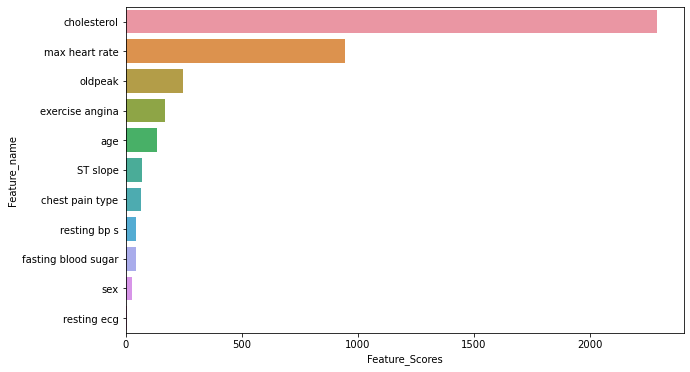

In [517]:
plt.figure(figsize=(10,6))
sns.barplot(x=best_feat_df['Feature_Scores'], y=best_feat_df['Feature_name'], data=best_feat_df)
plt.show()

In [518]:

# Get the best
# The higher the number the more important the feature
bestF = best_feat_df.nlargest(7,'Feature_Scores')

In [519]:
bestF

,Feature_Scores,Feature_name
4,2287.694270,cholesterol
7,946.344830,max heart rate
9,247.162654,oldpeak
8,168.989554,exercise angina
0,133.084465,age
10,69.732959,ST slope
2,68.144590,chest pain type


<AxesSubplot:xlabel='Feature_Scores', ylabel='Feature_name'>

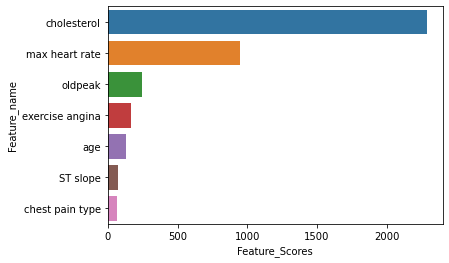

In [520]:
sns.barplot(x=bestF['Feature_Scores'], y=bestF['Feature_name'], data=bestF, label="X")

In [521]:
best_feat_df.nlargest(7,'Feature_Scores')['Feature_name'].unique()

array(['cholesterol', 'max heart rate', 'oldpeak', 'exercise angina',
       'age', 'ST slope', 'chest pain type'], dtype=object)

Dari total 12 kolom telah dipilih 7 kolom dengan nilai score tertinggi.

In [522]:
data.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

In [526]:
# store data setelah feature selection ke variable data2
data3 = data[['age', 'sex', 'cholesterol', 'max heart rate', 'exercise angina','oldpeak', 'chest pain type','target']]

In [527]:
data3

,age,sex,cholesterol,max heart rate,exercise angina,oldpeak,chest pain type,target
0,40,1,289,172,0,0.0,2,0
1,49,0,180,156,0,1.0,3,1
2,37,1,283,98,0,0.0,2,0
3,48,0,214,108,1,1.5,4,1
4,54,1,195,122,0,0.0,3,0
...,...,...,...,...,...,...,...,...
1185,45,1,264,132,0,1.2,1,1
1186,68,1,193,141,0,3.4,4,1
1187,57,1,131,115,1,1.2,4,1
1188,57,0,236,174,0,0.0,2,1


In [528]:
# Simpan data ke dalam bentuk csv
data3.to_csv('data3.csv', index=False)

In [529]:
import pandas as pd ###########################################################################################
data3 = pd.read_csv('data3.csv')
data3

,age,sex,cholesterol,max heart rate,exercise angina,oldpeak,chest pain type,target
0,40,1,289,172,0,0.0,2,0
1,49,0,180,156,0,1.0,3,1
2,37,1,283,98,0,0.0,2,0
3,48,0,214,108,1,1.5,4,1
4,54,1,195,122,0,0.0,3,0
...,...,...,...,...,...,...,...,...
1185,45,1,264,132,0,1.2,1,1
1186,68,1,193,141,0,3.4,4,1
1187,57,1,131,115,1,1.2,4,1
1188,57,0,236,174,0,0.0,2,1


In [530]:
data3.shape

(1190, 8)

In [531]:
# melihat jumlah nilai pada kolom Target
data3.target.value_counts()

1    629
0    561
Name: target, dtype: int64

In [532]:
# cek nilai yang duplicate
data3.duplicated().sum()

274

In [534]:
data3[data3.duplicated(['age','sex', 'cholesterol','max heart rate','exercise angina','oldpeak','chest pain type'], keep=False)]

,age,sex,cholesterol,max heart rate,exercise angina,oldpeak,chest pain type,target
90,49,0,208,160,0,0.0,2,0
163,49,0,208,160,0,0.0,2,0
375,61,1,0,105,1,0.0,4,1
386,61,1,0,105,1,0.0,4,1
444,60,1,186,140,1,0.5,4,1
...,...,...,...,...,...,...,...,...
1156,42,1,180,150,0,0.0,3,0
1157,61,1,207,138,1,1.9,4,1
1158,66,1,228,138,0,2.3,4,0
1159,46,1,311,120,1,1.8,4,1


In [535]:
#drop duplicate
data3.drop_duplicates(subset=['age','sex', 'cholesterol','max heart rate','exercise angina','oldpeak','chest pain type'], keep=False, inplace=True)

In [536]:
data3[data3.duplicated(['age','sex','chest pain type', 'cholesterol','max heart rate','exercise angina','oldpeak','chest pain type'], keep=False)]

,age,sex,cholesterol,max heart rate,exercise angina,oldpeak,chest pain type,target


In [537]:
data3.shape

(642, 8)

In [538]:
# cek tipe data
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 642 entries, 0 to 1189
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              642 non-null    int64  
 1   sex              642 non-null    int64  
 2   cholesterol      642 non-null    int64  
 3   max heart rate   642 non-null    int64  
 4   exercise angina  642 non-null    int64  
 5   oldpeak          642 non-null    float64
 6   chest pain type  642 non-null    int64  
 7   target           642 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 45.1 KB


In [539]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

In [540]:
# cek oulier pada data

# f,axes = plt.subplots(6, figsize=(10,30))
# sns.boxplot(data2['chol'], data=data2, ax=axes[0])
# sns.boxplot(data2['thalach'], data=data2, ax=axes[1])
# sns.boxplot(data2['exang'], data=data2, ax=axes[2])
# sns.boxplot(data2['oldpeak'], data=data2, ax=axes[3])
# sns.boxplot(data2['ca'], data=data2, ax=axes[4])
# sns.boxplot(data2['thal'], data=data2, ax=axes[5])

In [541]:
data3.columns

Index(['age', 'sex', 'cholesterol', 'max heart rate', 'exercise angina',
       'oldpeak', 'chest pain type', 'target'],
      dtype='object')

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cholesterol'}>],
       [<AxesSubplot:title={'center':'max heart rate'}>,
        <AxesSubplot:title={'center':'exercise angina'}>,
        <AxesSubplot:title={'center':'oldpeak'}>],
       [<AxesSubplot:title={'center':'chest pain type'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>]],
      dtype=object)

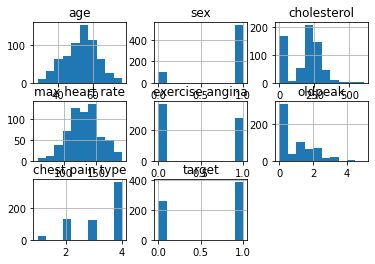

In [542]:
data3.hist()

<AxesSubplot:xlabel='oldpeak'>

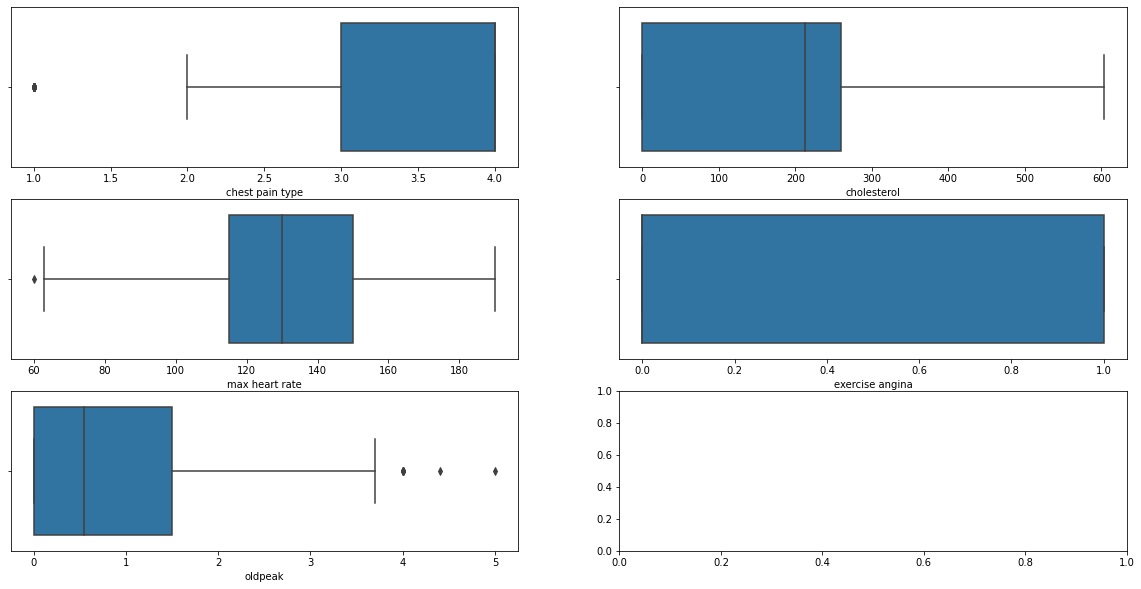

In [543]:
# cek oulier pada data

f,axes = plt.subplots(3,2, figsize=(20,10))
sns.boxplot(data3['chest pain type'], data=data3, ax=axes[0,0])
sns.boxplot(data3['cholesterol'], data=data3, ax=axes[0,1])
sns.boxplot(data3['max heart rate'], data=data3, ax=axes[1,0])
sns.boxplot(data3['exercise angina'], data=data3, ax=axes[1,1])
sns.boxplot(data3['oldpeak'], data=data3, ax=axes[2,0])

- Dari visualisasi tsb terlihat kolom chol, thalach, oldpeak, ca terdapat pencilan (outlier)

In [544]:
# deteksi outlier menggunakan IQR
def detect_outliers(df, x):
    Q1 = df[x].describe()['25%']
    Q3 = df[x].describe()['75%']
    IQR = Q3-Q1
     
    
    return df[(df[x] < Q1-1.5*IQR) | (df[x] > Q3+1.5*IQR)]

In [545]:
data3.columns

Index(['age', 'sex', 'cholesterol', 'max heart rate', 'exercise angina',
       'oldpeak', 'chest pain type', 'target'],
      dtype='object')

In [546]:
detect_outliers(data3, data3.columns[2])['chest pain type'].sort_values()

Series([], Name: chest pain type, dtype: int64)

In [547]:
detect_outliers(data2, data2.columns[3])['cholesterol'].sort_values()

380       0
399       0
400       0
401       0
402       0
       ... 
30      518
76      529
618     564
1039    564
149     603
Name: cholesterol, Length: 193, dtype: int64

In [548]:
detect_outliers(data2, data2.columns[4])['max heart rate'].sort_values()

391    60
Name: max heart rate, dtype: int64

In [549]:
detect_outliers(data2, data2.columns[5])['exercise angina'].sort_values()

Series([], Name: exercise angina, dtype: int64)

In [458]:
detect_outliers(data2, data2.columns[6])['oldpeak'].sort_values()

704     4.2
793     4.2
1070    4.2
1078    4.2
1172    4.4
167     5.0
773     5.6
1010    5.6
852     6.2
978     6.2
Name: oldpeak, dtype: float64

In [550]:
# detect_outliers(data2, data2.columns[7])['ST slope'].sort_values()

In [551]:
data3.columns

Index(['age', 'sex', 'cholesterol', 'max heart rate', 'exercise angina',
       'oldpeak', 'chest pain type', 'target'],
      dtype='object')

In [552]:
# mengganti nilai outlier dengan median masing-masing kolom

#data3.loc[data3['cholesterol'] > 400, 'cholesterol'] = np.median(data3['cholesterol'])
# data2.loc[data2['thalach'] < 80, 'thalach'] = np.median(data2['thalach'])
data3.loc[data3['oldpeak'] > 4, 'oldpeak'] = np.median(data3['oldpeak'])
# data2.loc[data2['ca'] > 2, 'ca'] = np.median(data2['ca'])

<AxesSubplot:xlabel='oldpeak'>

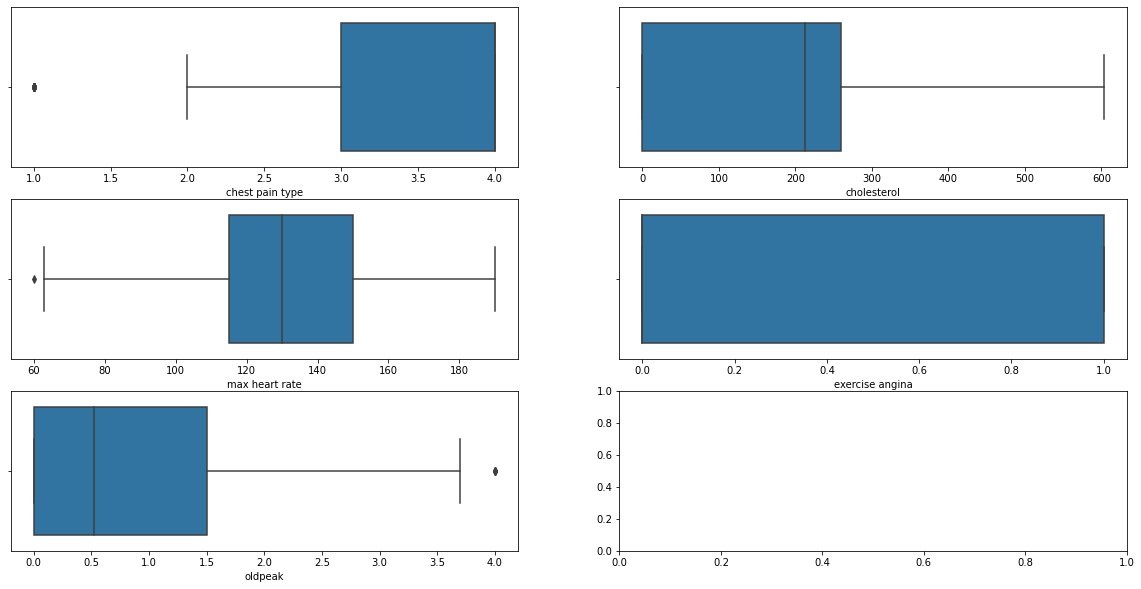

In [553]:
# cek oulier pada data

f,axes = plt.subplots(3,2, figsize=(20,10))
sns.boxplot(data3['chest pain type'], data=data3, ax=axes[0,0])
sns.boxplot(data3['cholesterol'], data=data3, ax=axes[0,1])
sns.boxplot(data3['max heart rate'], data=data3, ax=axes[1,0])
sns.boxplot(data3['exercise angina'], data=data3, ax=axes[1,1])
sns.boxplot(data3['oldpeak'], data=data3, ax=axes[2,0])

In [554]:
# # cek oulier
# f,axes = plt.subplots(6, figsize=(10,30))
# sns.boxplot(data2['chol'], data=data2, ax=axes[0])
# sns.boxplot(data2['thalach'], data=data2, ax=axes[1])
# sns.boxplot(data2['exang'], data=data2, ax=axes[2])
# sns.boxplot(data2['oldpeak'], data=data2, ax=axes[3])
# sns.boxplot(data2['ca'], data=data2, ax=axes[4])
# sns.boxplot(data2['thal'], data=data2, ax=axes[5])

- Tidak ada lagi outlier

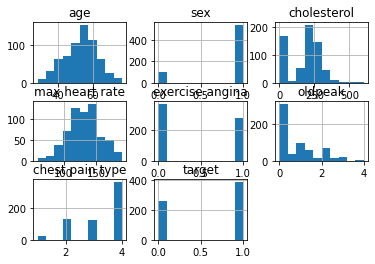

In [555]:
# Distribusi data
data3.hist()

plt.show()

In [556]:
# statistik data
data3.describe()

,age,sex,cholesterol,max heart rate,exercise angina,oldpeak,chest pain type,target
count,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000
mean,53.079439,0.836449,178.023364,131.479751,0.431464,0.844860,3.281931,0.596573
std,9.568127,0.370156,119.787817,24.481654,0.495667,0.966702,0.922902,0.490967
min,28.000000,0.000000,0.000000,60.000000,0.000000,0.000000,1.000000,0.000000
25%,47.000000,1.000000,0.000000,115.000000,0.000000,0.000000,3.000000,0.000000
50%,54.000000,1.000000,213.000000,130.000000,0.000000,0.525000,4.000000,1.000000
75%,60.000000,1.000000,260.000000,150.000000,1.000000,1.500000,4.000000,1.000000
max,77.000000,1.000000,603.000000,190.000000,1.000000,4.000000,4.000000,1.000000


In [557]:
x = data3.groupby('sex')['cholesterol'].count()

<AxesSubplot:xlabel='sex'>

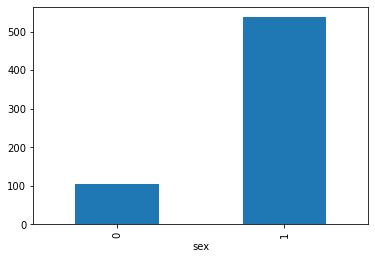

In [558]:
x.plot.bar()

### Data Preprocessing

In [577]:
data3.shape

(642, 8)

In [578]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [579]:
X = data3.drop(['target'], axis=1)
y = data3['target']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=1)

In [580]:
scaler = StandardScaler()

In [581]:
scaler.fit(X_train)

StandardScaler()

In [582]:
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

In [583]:
X_train

,age,sex,cholesterol,max heart rate,exercise angina,oldpeak,chest pain type
0,-1.332025,0.452319,0.917259,1.608646,-0.849934,-0.864072,-1.370727
120,-0.595738,-2.210827,0.573116,1.528259,-0.849934,-0.864072,-0.288772
506,0.245733,0.452319,0.547935,-0.039288,1.176562,0.389534,-0.288772
174,-0.385370,0.452319,0.061098,1.608646,-0.849934,-0.864072,-0.288772
203,-1.121658,0.452319,-0.274651,0.563615,-0.849934,-0.864072,-0.288772
...,...,...,...,...,...,...,...
130,-1.542393,0.452319,0.942440,-0.079481,-0.849934,-0.864072,-0.288772
145,-1.437209,0.452319,0.782959,0.000906,-0.849934,-0.864072,0.793184
72,-0.069819,0.452319,0.019130,0.724389,-0.849934,-0.864072,0.793184
237,-1.226841,0.452319,1.311764,-0.561804,1.176562,2.269944,0.793184


### Model Building

In [584]:
from sklearn.linear_model import LogisticRegression
#model = LogisticRegression(penalty='l2', C=0.02)
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [585]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test)
acc = accuracy_score(y_pred, y_test)
print("Test Accuracy: {:.2f}%".format(acc * 100))

y_pred_train = model.predict(X_train)
acc2 = accuracy_score(y_pred_train, y_train)
print("Train Accuracy: {:.2f}%".format(acc2 * 100))


Test Accuracy: 80.00%
Train Accuracy: 83.02%


In [586]:
clr = classification_report(y_test, y_pred)

print("Classification Report:\n---------------------\n", clr)

Classification Report:
---------------------
               precision    recall  f1-score   support

           0       0.76      0.59      0.67        22
           1       0.81      0.91      0.86        43

    accuracy                           0.80        65
   macro avg       0.79      0.75      0.76        65
weighted avg       0.80      0.80      0.79        65



### Tuning

In [587]:
from sklearn.model_selection import GridSearchCV

In [588]:
#List Hyperparameters yang akan diuji
penalty = ['l1', 'l2']
C = np.linspace(0,1)

#Menjadikan ke dalam bentuk dictionary
hyperparameters = dict(penalty=penalty, C=C)

In [589]:
#Membuat Object Logistic Regression
logreg = LogisticRegression()

In [590]:
#Memasukan ke Grid Search
#CV itu Cross Validation
#Menggunakan 10-Fold CV
clf = GridSearchCV(logreg, hyperparameters, cv=10)

In [591]:
#Fitting Model
best_model = clf.fit(X_train,y_train)

In [592]:

#Nilai hyperparameters terbaik
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])



Best Penalty: l2
Best C: 0.02040816326530612


In [593]:
# #Prediksi menggunakan model baru
# y_pred = best_model.predict(X_test)
# #Check performa dari model
# print(classification_report(y_test, y_pred))
# roc_auc_score(y_test, y_pred)

In [594]:
# model = LogisticRegression(penalty='l2', C=0.02, solver='liblinear')
# model.fit(X_train,y_train)

In [595]:
model = LogisticRegression(penalty='l2', C=0.02)
model.fit(X_train,y_train)

LogisticRegression(C=0.02)

In [596]:
y_pred = model.predict(X_test)
acc = accuracy_score(y_pred, y_test)
print("Test Accuracy: {:.2f}%".format(acc * 100))

y_pred_train = model.predict(X_train)
acc2 = accuracy_score(y_pred_train, y_train)
print("Train Accuracy: {:.2f}%".format(acc2 * 100))

Test Accuracy: 81.54%
Train Accuracy: 84.23%


In [576]:
clr = classification_report(y_test, y_pred)

print("Classification Report:\n---------------------\n", clr)

Classification Report:
---------------------
               precision    recall  f1-score   support

           0       0.77      0.65      0.71        46
           1       0.82      0.89      0.86        83

    accuracy                           0.81       129
   macro avg       0.80      0.77      0.78       129
weighted avg       0.80      0.81      0.80       129



In [412]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1])

In [413]:

cross = cross_val_score(model, X, y, cv=5)
print(cross.mean())

# ((cm_test[0][0] + cm_test[1][1])/len(y_test)))

matrix = confusion_matrix(y_pred,y_test, labels=[1,0])
print(matrix)
print((matrix[0][0] + matrix[1][1])/len(y_test))

0.8571342054263565
[[79  6]
 [10 34]]
0.875968992248062


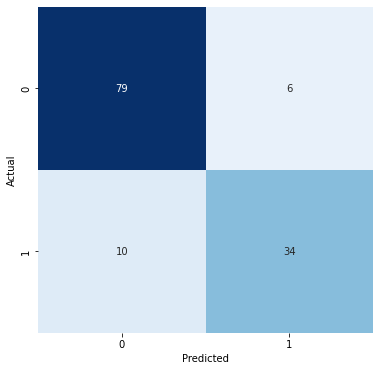

In [414]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot matrix
plt.figure(figsize=(6,6))
sns.heatmap(matrix, annot=True, vmin=0, cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [415]:
clr = classification_report(y_test, y_pred)

print("Classification Report:\n---------------------\n", clr)

Classification Report:
---------------------
               precision    recall  f1-score   support

           0       0.77      0.85      0.81        40
           1       0.93      0.89      0.91        89

    accuracy                           0.88       129
   macro avg       0.85      0.87      0.86       129
weighted avg       0.88      0.88      0.88       129



In [416]:
import numpy as np

In [417]:
# making predictive sistem
user_input = [67,1,286,108,1,1.5,3.0,3.0]


single_input = np.array(user_input).reshape(1, -1)

scaled = scaler.transform(single_input)

pd.DataFrame(scaled)

prediction = model.predict(scaled)

### Save Model

In [57]:
# Using Joblib
import joblib

model_file = open("logistic_regression_HeartD_model2.pkl","wb")
joblib.dump(model,model_file)
model_file.close()